In [23]:
import numpy as np
import pandas as pd
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

## 2.1 Generate Sampling Means and PMF

In [24]:
data = np.loadtxt("data.txt",skiprows=3)

In [25]:
def generate_samples_means(n):
    
    sample = [data[k:k+n] for k in range(0, len(data), n)]
    sample_df = pd.DataFrame(sample)
    sample_df.rename(columns = {0:'sample_1', 1:'sample_2', 2:'sample_3', 3:'sample_4', 4:'sample_5', }, inplace = True) 
    
    a = np.arange(data.size)//n
    b = np.bincount(np.arange(a.size)//n,data)/np.bincount(np.arange(a.size)//n)
    sample_means = b.tolist()
    sample_mean_df = pd.DataFrame(sample_means)
    sample_mean_df.rename(columns = {0:'sample_means'  }, inplace = True) 
    
    groups_means = pd.concat([sample_df, sample_mean_df], axis=1)
    
    return groups_means



In [26]:
generate_samples_means(5)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_means
0,0.447033,0.583482,0.477038,0.576808,0.528370,0.522546
1,0.545548,0.685800,0.442937,0.533431,0.529432,0.547430
2,0.470548,0.585316,0.571458,0.418927,0.470179,0.503285
3,0.486925,0.375148,0.497474,0.553072,0.488703,0.480264
4,0.561398,0.563814,0.509166,0.578537,0.515642,0.545712
...,...,...,...,...,...,...
19995,0.625198,0.407890,0.547911,0.492213,0.479616,0.510566
19996,0.477059,0.303361,0.518820,0.347662,0.377563,0.404893
19997,0.422774,0.492952,0.607991,0.287632,0.554446,0.473159
19998,0.475346,0.449986,0.425173,0.417910,0.536878,0.461059


## 2.2 Estimator

In [27]:
def estimate_mean_forQ2(n, delta):
    sample = np.loadtxt("data.txt",skiprows=3)
    i = 0.0
    count_groups = 0
    bin_groups = []
    bin_sum = {}
    bin_count_dict = {}
    
    a = np.arange(sample.size)//n
    b = np.bincount(np.arange(a.size)//n,sample)/np.bincount(np.arange(a.size)//n)
    sampling_means = b.tolist()
    
    for samples in sample:
        while i < 1.0 and count_groups < (1/delta):
            bin_groups.append([i, round(i + delta, 10)])
            i = round(i + delta, 5)
            count_groups += 1
            
    for k in bin_groups:
        bin_dict = { k[0] :[] for k in bin_groups }
        bin_pmf_dict = { k[0] :[] for k in bin_groups }
        
        
    mean_count = len(sampling_means)
    
    while mean_count > 0:
        for p in bin_dict:
            for means in sampling_means:
                if means > p and means < p+delta:
                    bin_dict.setdefault(p,[]).append(means)
                    mean_count = mean_count -1

    for p in bin_dict:
        bin_pmf_dict[p] = len(bin_dict[p])/(100000/n)
    for p in bin_dict:
         bin_count_dict[p] = len(bin_dict[p])

    mean_PMF = sum(k*v for k,v in bin_pmf_dict.items())
    
    return bin_count_dict, bin_pmf_dict, mean_PMF

In [28]:
counting, PMF_with_bins , mean_PMF_samples = estimate_mean_forQ2(5, 0.1)

In [29]:
print(counting)

{0.0: 0, 0.1: 0, 0.2: 0, 0.3: 267, 0.4: 9758, 0.5: 9701, 0.6: 274, 0.7: 0, 0.8: 0, 0.9: 0}


In [30]:
print(PMF_with_bins)

{0.0: 0.0, 0.1: 0.0, 0.2: 0.0, 0.3: 0.01335, 0.4: 0.4879, 0.5: 0.48505, 0.6: 0.0137, 0.7: 0.0, 0.8: 0.0, 0.9: 0.0}


In [31]:
print(mean_PMF_samples)

0.44991000000000003


In [32]:
Ture_mean = sum(data)/100000
print(Ture_mean)

0.5003089333150084


## 2.3 Implementation Requirement

In [33]:
def estimate_mean(n, delta):
    sample = np.loadtxt("data.txt",skiprows=3)
    i = 0.0
    count_groups = 0
    bin_groups = []
    d3 = dict()
    bin_sum = {}
    
    a = np.arange(sample.size)//n
    b = np.bincount(np.arange(a.size)//n,sample)/np.bincount(np.arange(a.size)//n)
    sampling_means = b.tolist()
    
    for samples in sample:
        while i < 1.0 and count_groups < (1/delta):
            bin_groups.append([i, round(i + delta, 10)])
            i = round(i + delta, 5)
            count_groups += 1
            
    for k in bin_groups:
        bin_dict = { k[0] :[] for k in bin_groups }
        bin_pmf_dict = { k[0] :[] for k in bin_groups }
        
        
    mean_count = len(sampling_means)
    
    while mean_count > 0:
        for p in bin_dict:
            for means in sampling_means:
                if means > p and means < p+delta:
                    bin_dict.setdefault(p,[]).append(means)
                    mean_count = mean_count -1

    for p in bin_dict:
        bin_pmf_dict[p] = len(bin_dict[p])/(100000/n)

    mean_PMF = sum(k*v for k,v in bin_pmf_dict.items())
    
    return bin_pmf_dict, mean_PMF

## 3 Plotting

In [34]:
case1dict, case1pmf = estimate_mean(20, 0.1)
print(case1dict)
print(case1pmf)

{0.0: 0.0, 0.1: 0.0, 0.2: 0.0, 0.3: 0.0, 0.4: 0.496, 0.5: 0.504, 0.6: 0.0, 0.7: 0.0, 0.8: 0.0, 0.9: 0.0}
0.4504


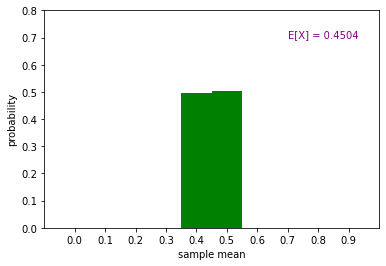

In [35]:
plt.bar(case1dict.keys(), case1dict.values(), 0.1 ,color='g')
plt.text(0.7, 0.7, 'E[X] = 0.4504', size=10, color='purple')
plt.ylim(0,0.8)
plt.ylabel ('probability')
plt.xlabel ('sample mean')
plt.xticks(list(case1dict.keys()))
plt.savefig('1.png')

In [36]:
case2dict, case2pmf = estimate_mean(100, 0.1)
print(case2dict)
print(case2pmf)

{0.0: 0.0, 0.1: 0.0, 0.2: 0.0, 0.3: 0.0, 0.4: 0.508, 0.5: 0.492, 0.6: 0.0, 0.7: 0.0, 0.8: 0.0, 0.9: 0.0}
0.44920000000000004


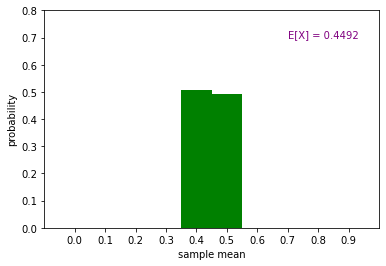

In [37]:
plt.bar(case2dict.keys(), case2dict.values(), 0.1 ,color='g')
plt.text(0.7, 0.7, 'E[X] = 0.4492', size=10, color='purple')
plt.ylim(0,0.8)
plt.ylabel ('probability')
plt.xlabel ('sample mean')
plt.xticks(list(case2dict.keys()))
plt.savefig('2.png')


In [38]:
case3dict, case3pmf = estimate_mean(20, 0.001)
print(case3dict)
print(case3pmf)

{0.0: 0.0, 0.001: 0.0, 0.002: 0.0, 0.003: 0.0, 0.004: 0.0, 0.005: 0.0, 0.006: 0.0, 0.007: 0.0, 0.008: 0.0, 0.009: 0.0, 0.01: 0.0, 0.011: 0.0, 0.012: 0.0, 0.013: 0.0, 0.014: 0.0, 0.015: 0.0, 0.016: 0.0, 0.017: 0.0, 0.018: 0.0, 0.019: 0.0, 0.02: 0.0, 0.021: 0.0, 0.022: 0.0, 0.023: 0.0, 0.024: 0.0, 0.025: 0.0, 0.026: 0.0, 0.027: 0.0, 0.028: 0.0, 0.029: 0.0, 0.03: 0.0, 0.031: 0.0, 0.032: 0.0, 0.033: 0.0, 0.034: 0.0, 0.035: 0.0, 0.036: 0.0, 0.037: 0.0, 0.038: 0.0, 0.039: 0.0, 0.04: 0.0, 0.041: 0.0, 0.042: 0.0, 0.043: 0.0, 0.044: 0.0, 0.045: 0.0, 0.046: 0.0, 0.047: 0.0, 0.048: 0.0, 0.049: 0.0, 0.05: 0.0, 0.051: 0.0, 0.052: 0.0, 0.053: 0.0, 0.054: 0.0, 0.055: 0.0, 0.056: 0.0, 0.057: 0.0, 0.058: 0.0, 0.059: 0.0, 0.06: 0.0, 0.061: 0.0, 0.062: 0.0, 0.063: 0.0, 0.064: 0.0, 0.065: 0.0, 0.066: 0.0, 0.067: 0.0, 0.068: 0.0, 0.069: 0.0, 0.07: 0.0, 0.071: 0.0, 0.072: 0.0, 0.073: 0.0, 0.074: 0.0, 0.075: 0.0, 0.076: 0.0, 0.077: 0.0, 0.078: 0.0, 0.079: 0.0, 0.08: 0.0, 0.081: 0.0, 0.082: 0.0, 0.083: 0.0, 0

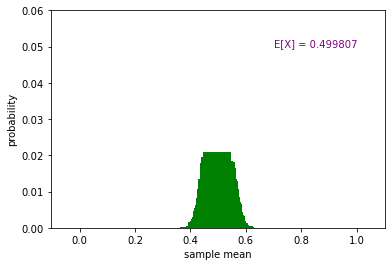

In [39]:
plt.bar(case3dict.keys(), case3dict.values(), 0.1 ,color='g')
plt.text(0.7, 0.05, 'E[X] = 0.499807', size=10, color='purple')
plt.ylim(0,0.06)
plt.ylabel ('probability')
plt.xlabel ('sample mean')
plt.savefig('3.png')

In [40]:
case4dict, case4pmf =estimate_mean(100, 0.001)
print(case4dict)
print(case4pmf)

{0.0: 0.0, 0.001: 0.0, 0.002: 0.0, 0.003: 0.0, 0.004: 0.0, 0.005: 0.0, 0.006: 0.0, 0.007: 0.0, 0.008: 0.0, 0.009: 0.0, 0.01: 0.0, 0.011: 0.0, 0.012: 0.0, 0.013: 0.0, 0.014: 0.0, 0.015: 0.0, 0.016: 0.0, 0.017: 0.0, 0.018: 0.0, 0.019: 0.0, 0.02: 0.0, 0.021: 0.0, 0.022: 0.0, 0.023: 0.0, 0.024: 0.0, 0.025: 0.0, 0.026: 0.0, 0.027: 0.0, 0.028: 0.0, 0.029: 0.0, 0.03: 0.0, 0.031: 0.0, 0.032: 0.0, 0.033: 0.0, 0.034: 0.0, 0.035: 0.0, 0.036: 0.0, 0.037: 0.0, 0.038: 0.0, 0.039: 0.0, 0.04: 0.0, 0.041: 0.0, 0.042: 0.0, 0.043: 0.0, 0.044: 0.0, 0.045: 0.0, 0.046: 0.0, 0.047: 0.0, 0.048: 0.0, 0.049: 0.0, 0.05: 0.0, 0.051: 0.0, 0.052: 0.0, 0.053: 0.0, 0.054: 0.0, 0.055: 0.0, 0.056: 0.0, 0.057: 0.0, 0.058: 0.0, 0.059: 0.0, 0.06: 0.0, 0.061: 0.0, 0.062: 0.0, 0.063: 0.0, 0.064: 0.0, 0.065: 0.0, 0.066: 0.0, 0.067: 0.0, 0.068: 0.0, 0.069: 0.0, 0.07: 0.0, 0.071: 0.0, 0.072: 0.0, 0.073: 0.0, 0.074: 0.0, 0.075: 0.0, 0.076: 0.0, 0.077: 0.0, 0.078: 0.0, 0.079: 0.0, 0.08: 0.0, 0.081: 0.0, 0.082: 0.0, 0.083: 0.0, 0

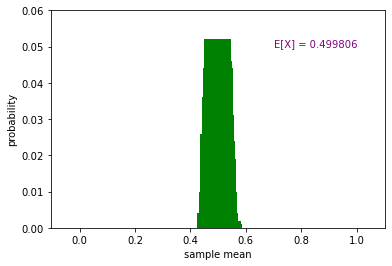

In [41]:
plt.bar(case4dict.keys(), case4dict.values(), 0.1 ,color='g')
plt.text(0.7, 0.05, 'E[X] = 0.499806', size=10, color='purple')
plt.ylim(0,0.06)
plt.ylabel ('probability')
plt.xlabel ('sample mean')
plt.savefig('4.png')

In [42]:
Ture_mean = sum(data)/100000
print(Ture_mean)

0.5003089333150084
